# Кодирование категориальных признаков

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

## Загрузка и предобработка данных

Используем данные из соревнования [Titanic](https://www.kaggle.com/c/titanic/)

In [2]:
# Будем использовать только обучающую выборку
data_loaded = pd.read_csv('all_perth_310121.csv', sep=",")

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BUILD_YEAR', ylabel='Density'>

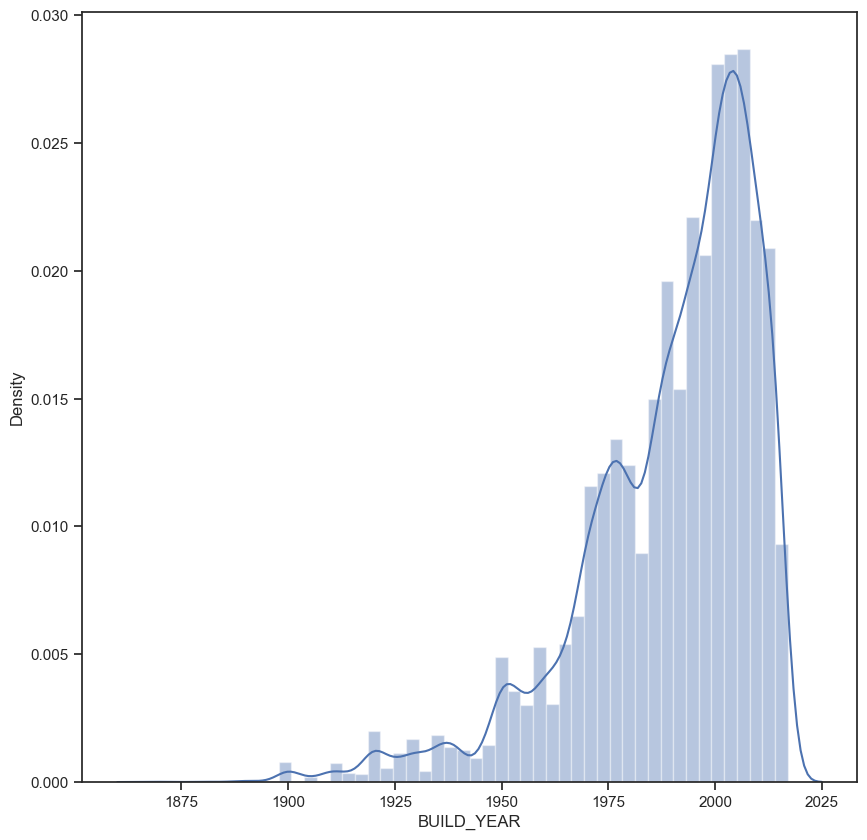

In [4]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data_loaded['BUILD_YEAR'])

In [5]:
# размер набора данных
data_loaded.shape

(33656, 19)

In [6]:
data_loaded.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [7]:
data_features = list(zip(
# признаки
[i for i in data_loaded.columns],
zip(
    # типы колонок
    [str(i) for i in data_loaded.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data_loaded.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('ADDRESS', ('object', 0)),
 ('SUBURB', ('object', 0)),
 ('PRICE', ('int64', 0)),
 ('BEDROOMS', ('int64', 0)),
 ('BATHROOMS', ('int64', 0)),
 ('GARAGE', ('float64', 2478)),
 ('LAND_AREA', ('int64', 0)),
 ('FLOOR_AREA', ('int64', 0)),
 ('BUILD_YEAR', ('float64', 3155)),
 ('CBD_DIST', ('int64', 0)),
 ('NEAREST_STN', ('object', 0)),
 ('NEAREST_STN_DIST', ('int64', 0)),
 ('DATE_SOLD', ('object', 0)),
 ('POSTCODE', ('int64', 0)),
 ('LATITUDE', ('float64', 0)),
 ('LONGITUDE', ('float64', 0)),
 ('NEAREST_SCH', ('object', 0)),
 ('NEAREST_SCH_DIST', ('float64', 0)),
 ('NEAREST_SCH_RANK', ('float64', 10952))]

In [8]:
# Используем только некоторые признаки
cols_filter = ['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS',
        'GARAGE', 'LATITUDE']
data = data_loaded[cols_filter]
data.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LATITUDE
0,1 Acorn Place,South Lake,565000,4,2,2.0,-32.115900
1,1 Addis Way,Wandi,365000,3,2,2.0,-32.193470
2,1 Ainsley Court,Camillo,287000,3,1,1.0,-32.120578
3,1 Albert Street,Bellevue,255000,2,1,2.0,-31.900547
4,1 Aman Place,Lockridge,325000,4,1,2.0,-31.885790


## 3. Count (frequency) encoding

![](img/count_frequency_encoding.png)

Count encoding предполагает что значение категории заменяется на количество раз, которое оно встречается в категории.

В случае frequency encoding вместо количества используется доля (процент) от количества записей.

#### Преимущества:
- Простота реализации.
- Не расширяется признаковое пространство.

#### Недостатки:
- Если два значения встречаются одинаковое количество раз, то они будут заменены на одно и то же количество и становятся неразличимы.


In [9]:
##pip install category_encoders

### Использование библиотеки [Сategory Encoders](https://contrib.scikit-learn.org/category_encoders/index.html)

In [10]:
from category_encoders.count import CountEncoder as ce_CountEncoder

In [11]:
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data[data.columns.difference(['ADDRESS'])])

In [12]:
data_COUNT_ENC

,BATHROOMS,BEDROOMS,GARAGE,LATITUDE,PRICE,SUBURB
0,2,4,2.0,-32.115900,565000,152
1,2,3,2.0,-32.193470,365000,97
2,1,3,1.0,-32.120578,287000,130
3,1,2,2.0,-31.900547,255000,109
4,1,4,2.0,-31.885790,325000,151
...,...,...,...,...,...,...
33651,3,4,2.0,-32.064580,1040000,99
33652,2,3,2.0,-31.867055,410000,50
33653,2,3,2.0,-31.866890,427000,50
33654,1,3,2.0,-31.839680,295000,94


In [13]:
data['PRICE'].unique()

array([ 565000,  365000,  287000, ...,   81900, 1151500, 1263000],
      dtype=int64)

In [14]:
data_COUNT_ENC['PRICE'].unique()

array([ 565000,  365000,  287000, ...,   81900, 1151500, 1263000],
      dtype=int64)

In [15]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data[data.columns.difference(['ADDRESS'])])

In [16]:
data_FREQ_ENC

,BATHROOMS,BEDROOMS,GARAGE,LATITUDE,PRICE,SUBURB
0,2,4,2.0,-32.115900,565000,0.004516
1,2,3,2.0,-32.193470,365000,0.002882
2,1,3,1.0,-32.120578,287000,0.003863
3,1,2,2.0,-31.900547,255000,0.003239
4,1,4,2.0,-31.885790,325000,0.004487
...,...,...,...,...,...,...
33651,3,4,2.0,-32.064580,1040000,0.002942
33652,2,3,2.0,-31.867055,410000,0.001486
33653,2,3,2.0,-31.866890,427000,0.001486
33654,1,3,2.0,-31.839680,295000,0.002793


In [17]:
data_FREQ_ENC['PRICE'].unique()

array([ 565000,  365000,  287000, ...,   81900, 1151500, 1263000],
      dtype=int64)

In [18]:
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
data['Y'] = boston_dataset.target
data.shape

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

(506, 14)

In [19]:
# Нужно ли масштабирование
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop('Y', axis=1)

In [21]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [22]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Y'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((404, 13), (102, 13))

In [23]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [24]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

In [25]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [26]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [32]:
## Масштабирование по медиане 

$$ x' = \frac{x - median(x)}{IQR} $$

где

$$ IQR = Q3(x) - Q1(x) $$

$IQR -$ разность между 1 и 3 квартилями.

Особенности метода:
- Медиана приводится к 0.
- Среднеквадратичное отклонение может варьироваться.
- Форма исходного распределения может изменяться.
- Максимальные и минимальные значения могут варьироваться.
- Устраняются выбросы. 

Метод реализован с использованием класса [RobustScaler.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

SyntaxError: invalid syntax (648147190.py, line 3)

In [28]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000,5.060000e+02
mean,9.337910e-01,0.909091,0.112067,0.069170,0.095400,0.103163,-0.181959,1.902672e-01,0.227470,0.202163,-0.212309,-1.667632,1.292417e-01
std,2.392616e+00,1.865796,0.531398,0.253994,0.662158,0.952056,0.573881,6.818457e-01,0.435363,0.435496,0.773195,4.379176,7.137493e-01
min,-6.959315e-02,0.000000,-0.714950,0.000000,-0.874286,-3.587398,-1.520897,-6.728244e-01,-0.200000,-0.369509,-2.303571,-18.761003,-9.625187e-01
25%,-4.852940e-02,0.000000,-0.348567,0.000000,-0.508571,-0.437669,-0.662080,-3.585445e-01,-0.050000,-0.131783,-0.589286,-0.770476,-4.407796e-01
50%,-7.697835e-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.199102e-17,0.000000,0.000000,0.000000,0.000000,8.847090e-17
75%,9.514706e-01,1.000000,0.651433,0.000000,0.491429,0.562331,0.337920,6.414555e-01,0.950000,0.868217,0.410714,0.229524,5.592204e-01
max,2.467838e+01,8.000000,1.398141,1.000000,1.902857,3.484417,0.458716,2.888060e+00,0.950000,0.984496,1.053571,0.261902,2.659670e+00


In [29]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

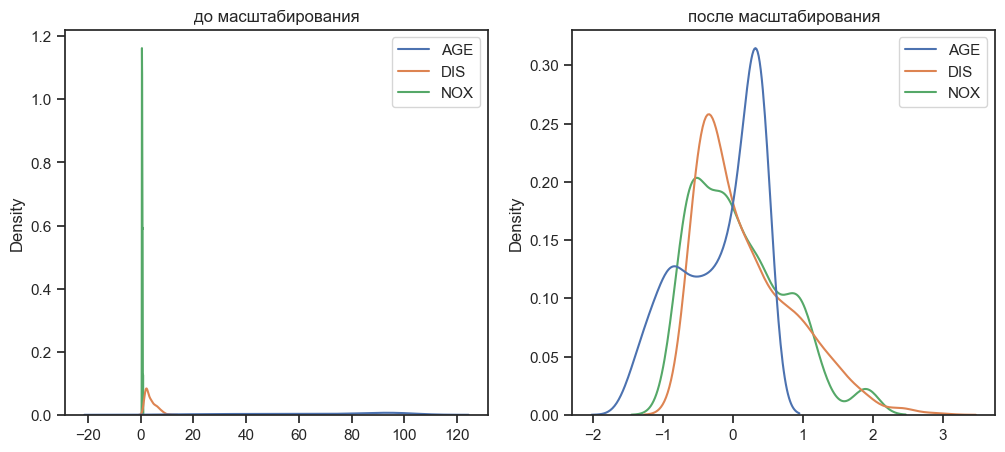

In [30]:
draw_kde(['AGE', 'DIS', 'NOX'], data, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

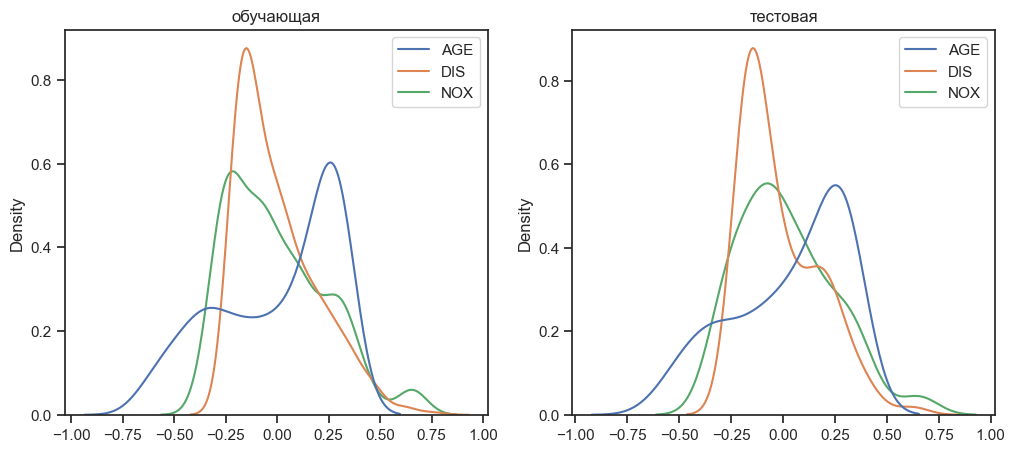

In [31]:
draw_kde(['AGE', 'DIS', 'NOX'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')